In [32]:
from Model import *

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [02:50<00:00,  3.40s/it]


Text(0, 0.5, 'Time to consenus')

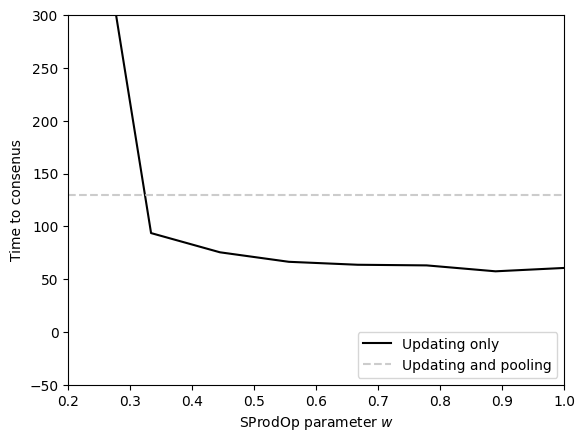

In [122]:
params = {"N": 100, "k": 3, "w": np.linspace(0,1,10), "alpha": 0.1, "epsilon" : 0.02, "pooling" : True, "uniform" : False, "pool_rate" : 0.015}

max_steps = 500
iterations = 5

results = mesa.batch_run(Model,parameters=params,number_processes=1,data_collection_period=1,display_progress=True,
    iterations=iterations,max_steps=max_steps)

results_df = pd.DataFrame(results)
admired_cols = ['Step', 'Majority', 'w', 'iteration']
results_df = results_df.drop(columns = [col for col in results_df.columns if col not in admired_cols])


nested_data = []
for w in params["w"]:
    data = []
    results_w = results_df[results_df.w == w]
    for it in range(iterations):
        results_it = results_w[(results_w.iteration == it) & (results_w.Majority >= 0.9)]
        if len(results_it) > 0:
            consensus_time = results_it.Step.values[0]
            data.append(consensus_time)
        else:
            consensus_time = max_steps
        data.append(consensus_time)

    nested_data.append(np.mean(np.array(data), axis = 0))
        
plt.plot(params["w"], nested_data, color = 'black', label = "Updating only")
plt.axhline(y = 130, color = '0.8', linestyle = 'dashed', label = "Updating and pooling")
plt.xlim([0.2,1])
plt.ylim([-50,300])
plt.legend(loc = 4)
plt.xlabel("SProdOp parameter $w$")
plt.ylabel("Time to consenus")

# plt.savefig("Figures/Varied_av_op_plots/.pdf")

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31.25it/s]


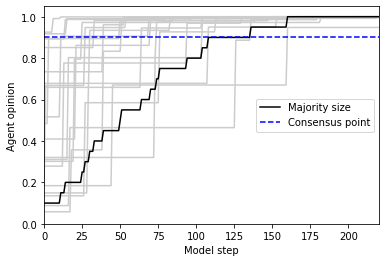

In [23]:
# This plot can be the explanatory plot. We can have the agent opinions plotted as light gray lines and the consensus line as a black line
# that is labelled with M >= ...

params = {"K": 20, "n": 3, "w": 1, "alpha": 0.1, "epsilon" : 0.02, "pooling" : False, "uniform" : False}
results = mesa.batch_run(Model,parameters=params,number_processes=1,data_collection_period=1,display_progress=True,
    iterations=1,max_steps=300)
results_df = pd.DataFrame(results)
admired_cols = ['Step', 'Opinion']

plt.figure()
for agentID in range(params["K"]):
    agent = results_df[results_df.AgentID == agentID]
    plt.plot(agent.Step, agent.Opinion, '0.8')
    
plt.plot(results_df.Step, results_df.Consensus, color = 'black', label = 'Majority size')
plt.xlabel("Model step")
plt.ylabel("Agent opinion")
plt.axhline(y = 0.9, color = 'b', linestyle = 'dashed', label = 'Consensus point')
plt.legend(loc = 5)
plt.ylim(0,1.05)
plt.xlim(0, 220)

# plt.savefig("Figures/demonstration_without_pooling.pdf")

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:27<00:00,  3.59it/s]


Text(0, 0.5, 'Average opinion')

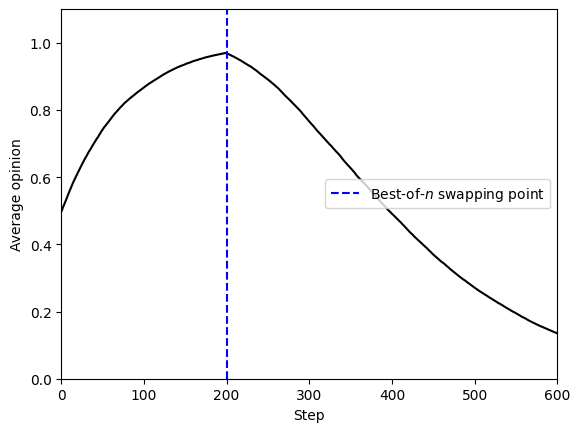

In [3]:
# Plotting average opinion of agents against time step, emulating the simulation run in Figure 2 on Chanelle's opinion pooling
# paper using the same parameters
params = {"K": 100, "n": 3, "w": 0.5, "alpha": 0.1, "epsilon" : 0.02, "pooling" : False, "uniform" : False, "dynamics" : "switching"}
results = mesa.batch_run(Model,parameters=params,number_processes=1,data_collection_period=1,display_progress=True,
    iterations=100,max_steps=600)
results_df = pd.DataFrame(results)

plt.figure()
data = []
for it in range(100):
    results_it = results_df[results_df.iteration == it]
#     results_it = results_it.drop(columns = [col for col in results_it.columns if col not in admired_cols])
#     results_it.drop_duplicates()
    data.append(results_it.Average_opinion)
    
plt.plot(results_it.Step, np.mean(np.array(data), axis=0), color = 'black')
# plt.title("Average opinion against step. K = 100, n = 3, alpha = 0.1, epsilon = 0.02, its = 30")
# plt.axhline(y = 0.9, color = 'gray', linestyle = 'dashed', label = 'H1 Consensus point')
# plt.axhline(y = 0.1, color = 'green', linestyle = 'dashed', label = 'H2 Consensus point')
plt.axvline(x = 200, color = 'blue', linestyle = 'dashed', label = 'Best-of-$n$ swapping point')
plt.legend(loc = 5)
plt.xlim(0,600)
plt.ylim(0,1.1)
plt.xlabel("Step")
plt.ylabel("Average opinion")
# plt.savefig("Figures/switching_without_pooling2.pdf")

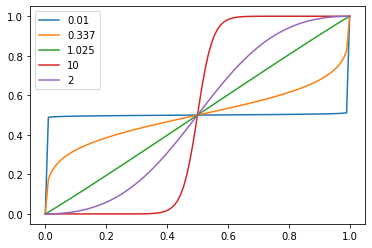

In [57]:
# Recreating figure 3 from opinion pooling paper to make sure that the pooling mechanism is implemented properly.

for w in (0.01, 0.337, 1.025, 10):
    data = []
    for x in np.linspace(0,1,100):
        c_x = x**w / (x**w + (1-x)**w)
        data.append(c_x)
    plt.plot(np.linspace(0,1,100),data, label = w)
    plt.legend()
    
plt.savefig('Figures/SProdOP_varying_w.pdf')

100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.52it/s]


(0.0, 1.1)

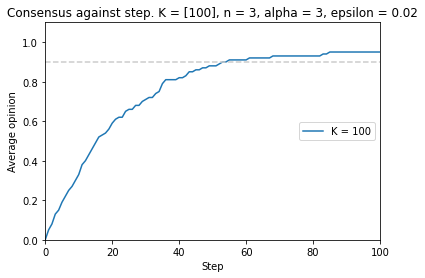

In [7]:
params = {"K": [100], "n": 3, "w": 1, "alpha": 0.1, "epsilon" : 0.02, "pooling" : True, "uniform" : True}
results = mesa.batch_run(Model,parameters=params,number_processes=1,data_collection_period=1,display_progress=True,
    iterations=10,max_steps=100)
results_df = pd.DataFrame(results)

plt.figure()
admired_cols = ['Step', 'Consensus']

for k in params["K"]:
    results_k = results_df[results_df.K == k]
    data = []
    for it in range(1):
        results_it = results_k[results_k.iteration == it]
        results_it = results_it.drop(columns = [col for col in results_it.columns if col not in admired_cols])
#         results_it.drop_duplicates()
        data.append(results_it.Consensus)

    plt.plot(results_it.Step, np.mean(np.array(data), axis=0), label = "K = " + str(k))
    plt.legend(loc = 5)
    
plt.title("Consensus against step. K = "+str(params["K"])+", n = "+str(params["n"])+", alpha = "+str(params["n"])+", epsilon = "+str(params["epsilon"]))
plt.xlabel("Step")
plt.axhline(y = 0.9, color = '0.8', linestyle = 'dashed')
plt.ylabel("Average opinion")
plt.xlim([0,100])
plt.ylim([0,1.1])

# plt.savefig('Figures/average_opinion_varying_K_uniform.pdf')

## 4.1 Performance of opinion pooling in the Dynamic Switching environment

### 4.1.1 Varying K and N

In [70]:
## The current method stores too much data -> takes too long


theta_range = [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10]

# inv_range = [0.001,0.002,0.003,0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]

k_range = [1,2,3,4,5]


# N_range = [10,20,30,40,50,60,70,80,90,100]

# s_range = [0, 0.04, 0.08, 0.12, 0.016, 0.20]


iterations = 10
max_steps = 1000

desired_cols = ['iteration', 'Step', 'k', 'w', 'Average_opinion', 'Option 0 quality',
               'Option 1 quality', 'Opinion', 'Majority', 'Dynamic_Majority']


metrics_df = pd.DataFrame(columns = ['N', 'k', 'Time to Consensus'])

data_mat = np.empty(shape = (len(k_range), len(theta_range)) )
std_mat = np.empty(shape = (len(k_range), len(theta_range)) )
fail_mat = np.empty(shape = (len(k_range), len(theta_range)) )


y_idx = -1

for k in k_range:
    
    y_idx += 1
    x_idx = -1

    for theta in theta_range:
        
        x_idx += 1

        params = {"N": 50, "k": k, "w": 1 , "alpha": 0.05, "epsilon" : 0.02, "inversion_rate" : 0,
              "pooling" : True, "pool_rate" : theta,  "uniform" : False, "dynamics" : "switching",
              "measures" : "none", "dynamic_point" : 400, "s_proportion" : 0}

        results = mesa.batch_run(Model, parameters=params, number_processes=1,
                                 data_collection_period=1,display_progress=True,
                iterations = iterations, max_steps=max_steps)

        results_df = pd.DataFrame(results)
        
        # Could probably be made faster by removing values before turning into a dataframe in the first place
        results_df = results_df.loc[:,desired_cols]

        data, std, fails = return_consensus_time(results_df, params, iterations, max_steps, reconvergence = True)
        
        data_mat[y_idx, x_idx] = data
        std_mat[y_idx, x_idx] = std
        fail_mat[y_idx, x_idx] = fails
        
        data_mat = data_mat

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.91s/it]


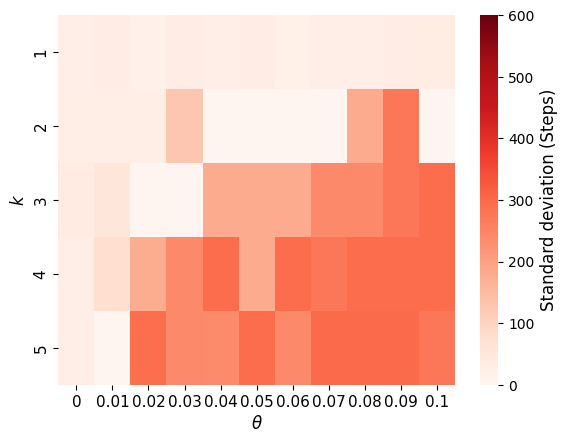

In [83]:
# np.savetxt('PoolRateMats/ProdOp/Switching/Reconvergent/VaryingThetaandK.csv' , data_mat,  delimiter = ',')
# np.savetxt('PoolRateMats/ProdOp/Switching/Reconvergent/VaryingThetaandK/fail.csv' , fail_mat,  delimiter = ',')
# np.savetxt('PoolRateMats/ProdOp/Switching/Reconvergent/VaryingThetaandK/std.csv' , std_mat,  delimiter = ',')

# with open('PoolRateMats/ProdOp/Switching/Reconvergent/VaryingThetaandK/params.txt', 'w') as f:
#     print(params, file=f)

fig, ax = plt.subplots()

sns.heatmap(std_mat, vmin = 0, vmax = 600, cmap = 'Reds', yticklabels = k_range,
            xticklabels = theta_range, cbar_kws={'label': 'Standard deviation (Steps)'})

ax.figure.axes[-1].yaxis.label.set_size(12)

# data_mat
plt.ylabel('$k$', fontsize = 12)
plt.xlabel(r'$\theta$', fontsize = 12)
plt.xticks(fontsize = 11)

plt.yticks(fontsize = 11)

plt.savefig('PoolRateFigures/ProdOp/Switching/Reconvergent/VaryingThetaandK/std.pdf', bbox_inches = 'tight')
# plt.show()

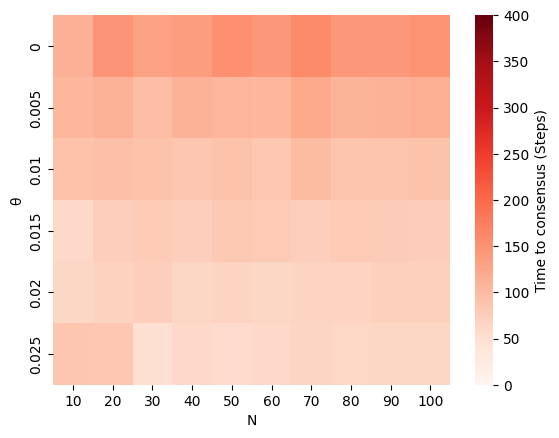

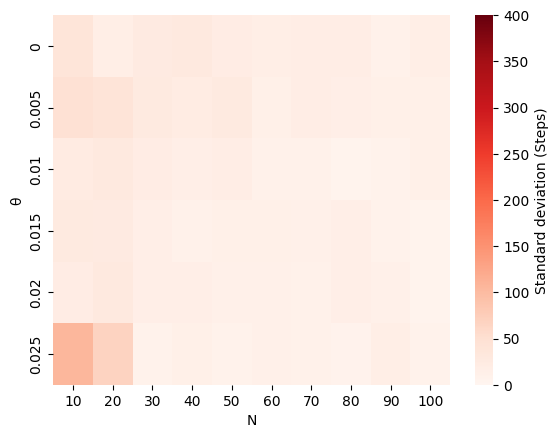

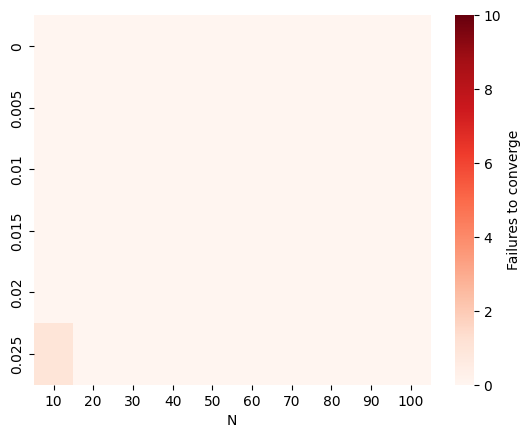

In [133]:
# time = np.loadtxt('PoolRateMats/ProdOp/VisitDynamic/Convergence/VaryingNandTheta/time.csv', delimiter = ',', dtype = float)
# fail = np.loadtxt('PoolRateMats/ProdOp/VisitDynamic/Convergence/VaryingNandTheta/fail.csv', delimiter = ',', dtype = float)
# std = np.loadtxt('PoolRateMats/ProdOp/VisitDynamic/Convergence/VaryingNandTheta/std.csv', delimiter = ',', dtype = float)


# sns.heatmap(time, vmin = 0, vmax = 400, cmap = 'Reds', yticklabels = [0,0.005,0.01,0.015,0.02,0.025], 
#             xticklabels = [10,20,30,40,50,60,70,80,90,100] , cbar_kws={'label': 'Time to consensus (Steps)'})


# # plt.ylabel('k')
# plt.xlabel('N')
# plt.ylabel('\u03B8')


# plt.savefig('PoolRateFigures/ProdOp/VisitDynamic/Convergence/VaryingNandTheta/time.pdf')
# plt.show()

# sns.heatmap(std, vmin = 0, vmax = 400, cmap = 'Reds', yticklabels = [0,0.005,0.01,0.015,0.02,0.025] , 
#             xticklabels = [10,20,30,40,50,60,70,80,90,100] , cbar_kws={'label': 'Standard deviation (Steps)'})


# # plt.ylabel('k')
# plt.xlabel('N')
# plt.ylabel('\u03B8')


# plt.savefig('PoolRateFigures/ProdOp/VisitDynamic/Convergence/VaryingNandTheta/std.pdf')
# plt.show()


# sns.heatmap(fail, vmin = 0, vmax = 10, cmap = 'Reds', yticklabels = [0,0.005,0.01,0.015,0.02,0.025] , 
#             xticklabels = [10,20,30,40,50,60,70,80,90,100] , cbar_kws={'label': 'Failures to converge'})


# # plt.ylabel('k')
# plt.xlabel('N')


# plt.savefig('PoolRateFigures/ProdOp/VisitDynamic/Convergence/VaryingNandTheta/fail.pdf')
# plt.show()

In [16]:
iterations = 10
max_steps = 1000

params = {"N": 50, "k": 3, "w": 1 , "alpha": 0.05, "epsilon" : 0.02, "inversion_rate" : 0.005,
              "pooling" : True, "pool_rate" : 0.015,  "uniform" : False, "dynamics" : "switching",
              "measures" : "none", "dynamic_point" : 400, "s_proportion" : 0}


results = mesa.batch_run(Model, parameters=params, number_processes=1,
                                 data_collection_period=1,display_progress=True,
                iterations = iterations, max_steps=max_steps)

results_df = pd.DataFrame(results)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:17<00:00,  1.72s/it]


In [11]:
iterations = 25
max_steps = 400

params = {"N": 50, "k": 10, "w": 1 , "alpha": 0.05, "epsilon" : 0.02, "inversion_rate" : 0,
              "pooling" : True, "pool_rate" : 0.015,  "uniform" : False, "dynamics" : "none",
              "measures" : "none", "dynamic_point" : 400, "s_proportion" : 0}


results = mesa.batch_run(Model, parameters=params, number_processes=1,
                                 data_collection_period=1,display_progress=True,
                iterations = iterations, max_steps=max_steps)

results_df = pd.DataFrame(results)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.47it/s]


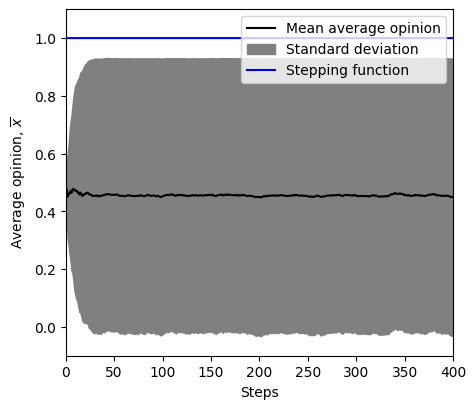

In [31]:
plot_average_opinion(results_df, iterations, max_steps, figsize  = [5,4.5])
# plt.xlim(0,400)
# plt.ylim(0,1.2)
plt.legend(loc = 1, fontsize = 10)
plt.xlabel('Steps', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.ylabel('Average opinion, $\overline{x}$', fontsize = 10)

plt.savefig('PoolRateFigures/ProdOp/NonDynamic/VaryingKandN/50N10K.pdf' , bbox_inches = 'tight')

plt.show()

# plt.plot(results_df.Step, re

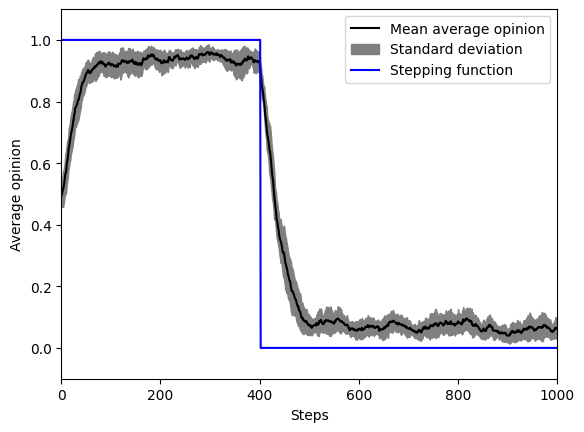

In [25]:
plot_average_opinion(results_df, iterations, max_steps)
# plt.xlim(0,400)
# plt.ylim(0,1.2)
plt.legend(loc = 1)
plt.xlabel('Steps')
plt.ylabel('Average opinion')
plt.show()
# plt.plot(results_df.Step, results_df["Option 1 quality"])

# fig, ax = plt.subplots(figsize=(10, 5))

# plt.savefig('PoolRateFigures/ProdOp/NonDynamic/VaryingKandN/50N10K.pdf', bbox_inches = 'tight')

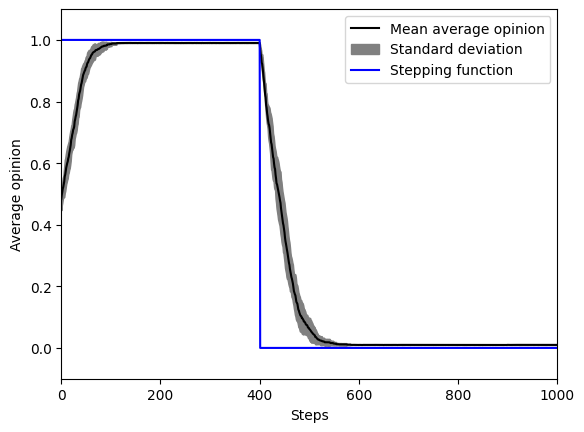

In [27]:
plot_average_opinion(results_df, iterations, max_steps)
# plt.xlim(0,400)
# plt.ylim(0,1.2)
plt.legend(loc = 1)
plt.xlabel('Steps')
plt.ylabel('Average opinion')
plt.show()
# plt.plot(results

In [74]:
matrix = np.array([data_mat, data_mat1, data_mat2, data_mat3])

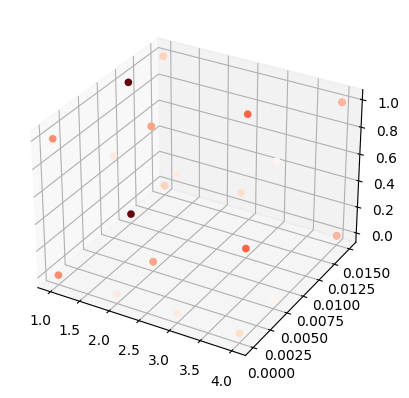

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


img = ax.scatter(k_mat, theta_mat, 0, c= data_mat, cmap='Reds', alpha=1)
img = ax.scatter(k_mat, theta_mat, 1, c= data_mat, cmap='Reds', alpha=1)

plt.show()